# Temprature trends of Ann Arbor and Detroit (2006-2019)

In this notebook, I will use Cairo’s principles of truth, beauty, function, and insight to answer the research question: "Has the temprature trend changed in Ann Arbor and Detroit over the last few years?" 

The data used in this notebook is taken from the World Bank's website. 

<IPython.core.display.Javascript object>


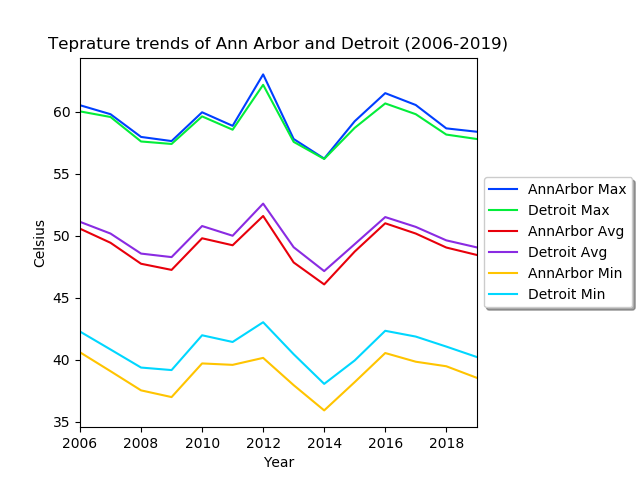

Text(0.5, 1.0, 'Teprature trends of Ann Arbor and Detroit (2006-2019)')

In [131]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

df_AnnArbor = pd.read_csv('Ann Arbor 1990-2019.csv')
df_Detroit= pd.read_csv('Detroit.csv')

maxTemp = pd.DataFrame({'AnnArbor Max':df_AnnArbor.set_index('NAME').groupby('DATE')['TMAX'].mean(),
                       'Detroit Max':df_Detroit.set_index('NAME').groupby('DATE')['TMAX'].mean()}).dropna()
avgTemp = pd.DataFrame({'AnnArbor Avg':df_AnnArbor.set_index('NAME').groupby('DATE')['TAVG'].mean(),
                       'Detroit Avg':df_Detroit.set_index('NAME').groupby('DATE')['TAVG'].mean()}).dropna()
minTemp = pd.DataFrame({'AnnArbor Min':df_AnnArbor.set_index('NAME').groupby('DATE')['TMIN'].mean(),
                       'Detroit Min':df_Detroit.set_index('NAME').groupby('DATE')['TMIN'].mean()}).dropna()
temps = maxTemp.merge(avgTemp,right_index=True,left_index=True).merge(minTemp,right_index=True,left_index=True)

plt.style.use('seaborn-bright')
ax = temps.plot()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True)
plt.ylabel('Celsius')
plt.xlabel('Year')
plt.title('Temprature trends of Ann Arbor and Detroit (2006-2019)')